In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,TargetEncoder
from sklearn.pipeline import Pipeline
import pickle



In [149]:
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=11))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [89]:
with open(r'C:\Users\hetbh\OneDrive\Desktop\CropInsight3\Artifacts\dataframe.pkl','rb')as file:
    df=pickle.load(file)

In [150]:
# df.drop('Market Name',axis=1,inplace=True)
df.head()

,District Name,Market Name,Commodity,Min Price(Rs.),Max Price(Rs.),Model Price,Year,Month,Day
0,Junagarh,Junagadh,Soyabean,2750.0,3500.0,3125.0,2018.0,6.0,13.0
1,Surat,S.Mandvi,Green Gram (Moong)(Whole),5750.0,6710.0,6230.0,2020.0,6.0,14.0
2,Bhavnagar,Bhavnagar,Wheat,2345.0,2365.0,2355.0,2022.0,7.0,25.0
3,Rajkot,Dhoraji,Wheat,2405.0,2590.0,2570.0,2024.0,6.0,4.0
4,Amreli,Amreli,Wheat,2250.0,3090.0,2905.0,2023.0,2.0,4.0


In [151]:
from sklearn.model_selection import train_test_split
X=df.drop('Model Price',axis=1)
y=df['Model Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [152]:
X_train.head()

,District Name,Market Name,Commodity,Min Price(Rs.),Max Price(Rs.),Year,Month,Day
118611,Devbhumi Dwarka,Bhanvad,Cotton,4000.0,4350.0,2018.0,10.0,9.0
78434,Devbhumi Dwarka,Bhanvad,Cotton,5000.0,5250.0,2021.0,1.0,20.0
97318,Rajkot,Jasdan,Green Gram (Moong)(Whole),5000.0,7555.0,2022.0,12.0,27.0
148241,Junagarh,Mangrol,Groundnut,7725.0,7750.0,2022.0,7.0,25.0
78419,Bhavnagar,Taleja,Wheat,1960.0,2710.0,2022.0,5.0,7.0


In [153]:
cat_feature=['District Name','Commodity','Year','Market Name']
num_feature=['Min Price(Rs.)','Min Price(Rs.)','Month','Day']
target_col='Max Price'

In [154]:
num_input_features = X_train.shape[1]

In [155]:
tf_model = KerasRegressor(model=create_model, epochs=100, batch_size=32, verbose=1)

In [156]:
# X_transformed = preprocessor.fit_transform(X_train)

In [157]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Market Name',TargetEncoder(),['Market Name']),
        ('Commodity', OneHotEncoder(drop='first'), ['Commodity']),
        ('District_Name', TargetEncoder(), ['District Name']),
        ('num', StandardScaler(), num_feature)
    ]
)

# Create the pipeline with the TensorFlow model
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('tf_model', tf_model)
    ]
)

In [158]:
X_train.head()

,District Name,Market Name,Commodity,Min Price(Rs.),Max Price(Rs.),Year,Month,Day
118611,Devbhumi Dwarka,Bhanvad,Cotton,4000.0,4350.0,2018.0,10.0,9.0
78434,Devbhumi Dwarka,Bhanvad,Cotton,5000.0,5250.0,2021.0,1.0,20.0
97318,Rajkot,Jasdan,Green Gram (Moong)(Whole),5000.0,7555.0,2022.0,12.0,27.0
148241,Junagarh,Mangrol,Groundnut,7725.0,7750.0,2022.0,7.0,25.0
78419,Bhavnagar,Taleja,Wheat,1960.0,2710.0,2022.0,5.0,7.0


In [159]:
pipeline.fit(X_train,y_train)

Epoch 1/100


C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3951/3951 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4096406.7500
Epoch 2/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 928276.6250
Epoch 3/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 628692.8750
Epoch 4/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 564756.1875
Epoch 5/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 525984.9375
Epoch 6/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 481782.2188
Epoch 7/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 440714.0625
Epoch 8/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 418618.2188
Epoch 9/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 405627.5000
Epoch 10/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 377539.9375
Epoch 11/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 366145.7812
Epoch 12/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 366939.2188
Epoch 13/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 349247.0000
Epoch 14/100
3951/3951 ━━━━━━━━━

3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 242469.1250
Epoch 76/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 238594.8438
Epoch 77/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 238493.5000
Epoch 78/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 235026.8125
Epoch 79/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 250325.6875
Epoch 80/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 238859.9062
Epoch 81/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 235167.3906
Epoch 82/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 240409.1719
Epoch 83/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 250271.0625
Epoch 84/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 239927.4062
Epoch 85/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 233700.4844
Epoch 86/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 241035.4688
Epoch 87/100
3951/3951 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 237827.5156
Epoch 88/100
3951/3951 ━━

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Market Name',
                                                  TargetEncoder(),
                                                  ['Market Name']),
                                                 ('Commodity',
                                                  OneHotEncoder(drop='first'),
                                                  ['Commodity']),
                                                 ('District_Name',
                                                  TargetEncoder(),
                                                  ['District Name']),
                                                 ('num', StandardScaler(),
                                                  ['Min Price(Rs.)',
                                                   'Min Price(Rs.)', 'Month',
                                                   'Day'])])),
                ('tf_model',
                 KerasRegressor(batch_size=32, epochs=100, model=<function create_model at 0x00000244C7A15620>))])

In [160]:
y_pred=pipeline.predict(X_test)

1946/1946 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [161]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

In [162]:
print(r2_score(y_test,y_pred))

0.9543500865575716


In [163]:
keras_model = pipeline.named_steps['tf_model'].model_

In [186]:
history_dict=keras_model.history.history
history_dict

{}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


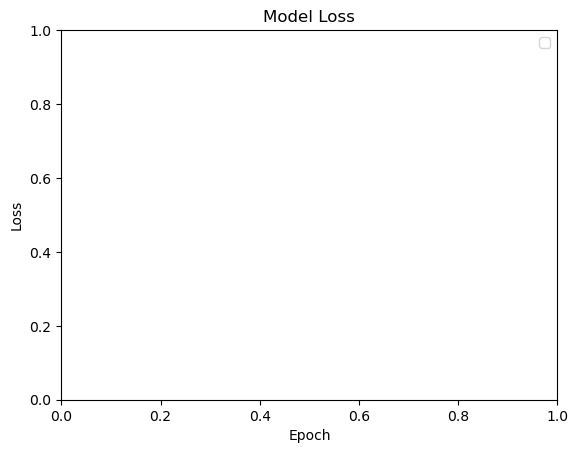

In [191]:

# if 'val_loss' in history_dict:
    #plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [194]:
from tensorflow.keras.callbacks import History
history=History()

In [196]:
y_pred

array([2059.3503, 7998.503 , 1836.3721, ..., 1793.4955, 7679.546 ,
       4224.7373], dtype=float32)

In [199]:
with open(r'C:\Users\hetbh\OneDrive\Desktop\CropInsight3\Artifacts\tf_model.pkl','wb')as f:
    pickle.dump(tf_model,f)

NameError: name 'model' is not defined